In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
import statistics

In [ ]:
from sklearn import preprocessing

In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/diplom/dataset/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')


In [ ]:
dataframe

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29,80,192.168.10.15,61374,6,7/7/2017 5:02,61,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,192.168.10.15-72.21.91.29-61378-80-6,72.21.91.29,80,192.168.10.15,61378,6,7/7/2017 5:02,72,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29,80,192.168.10.15,61375,6,7/7/2017 5:02,75,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187,80,192.168.10.15,61323,6,7/7/2017 5:02,48,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       225745 non-null  object 
 1    Source IP                    225745 non-null  object 
 2    Source Port                  225745 non-null  int64  
 3    Destination IP               225745 non-null  object 
 4    Destination Port             225745 non-null  int64  
 5    Protocol                     225745 non-null  int64  
 6    Timestamp                    225745 non-null  object 
 7    Flow Duration                225745 non-null  int64  
 8    Total Fwd Packets            225745 non-null  int64  
 9    Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets   225745 non-null  int64  
 11   Total Length of Bwd Packets  225745 non-null  int64  
 12   Fwd Packet Length Max        225745 non-nul

In [ ]:
feature_names = dataframe.columns.tolist()
for column in feature_names:
    print(column)
    print(dataframe[column].value_counts(dropna=False))

Flow ID
8.0.6.4-8.6.0.1-0-0-0                      44
192.168.10.25-17.253.14.125-123-123-17     44
192.168.10.255-192.168.10.3-137-137-17     24
192.168.10.19-192.168.10.50-137-137-17     19
192.168.10.16-192.168.10.50-48318-139-6    19
                                           ..
192.168.10.3-192.168.10.5-53-55565-17       1
192.168.10.3-192.168.10.5-53-57717-17       1
192.168.10.3-192.168.10.5-53-56816-17       1
192.168.10.3-192.168.10.5-53-64256-17       1
192.168.10.3-192.168.10.12-53-46845-17      1
Name: Flow ID, Length: 86421, dtype: int64
 Source IP
172.16.0.1        128181
192.168.10.50      32896
192.168.10.15       9278
192.168.10.12       9216
192.168.10.3        8692
                   ...  
216.200.232.14         1
23.23.158.50           1
54.165.125.146         1
91.215.103.65          1
8.41.222.187           1
Name:  Source IP, Length: 2067, dtype: int64
 Source Port
80       33528
443       6419
123        362
137        274
22         156
         ...  
45363    

In [ ]:
# check any null value present
dataframe.isnull().values.any()

True

In [ ]:
#  drop columns containing infinite or very large values
dataframe=dataframe.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
#drop null
dataframe.dropna(how = 'all')

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,192.168.10.15-72.21.91.29-61374-80-6,72.21.91.29,80,192.168.10.15,61374,6,7/7/2017 5:02,61,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,192.168.10.15-72.21.91.29-61378-80-6,72.21.91.29,80,192.168.10.15,61378,6,7/7/2017 5:02,72,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,192.168.10.15-72.21.91.29-61375-80-6,72.21.91.29,80,192.168.10.15,61375,6,7/7/2017 5:02,75,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,192.168.10.15-8.41.222.187-61323-80-6,8.41.222.187,80,192.168.10.15,61323,6,7/7/2017 5:02,48,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
print("Unique values in 'Flow ID' before replacement:", dataframe['Flow ID'].unique())
dataframe['Flow ID'] = label_encoder.fit_transform(dataframe['Flow ID'])
print("Unique values in 'Flow ID' after replacement:", dataframe['Flow ID'].unique())

Unique values in 'Flow ID' before replacement: ['192.168.10.5-104.16.207.165-54865-443-6'
 '192.168.10.5-104.16.28.216-55054-80-6'
 '192.168.10.5-104.16.28.216-55055-80-6' ...
 '192.168.10.3-192.168.10.8-445-10414-6'
 '192.168.10.3-192.168.10.8-53-51617-17'
 '192.168.10.8-72.21.81.253-10398-443-6']
Unique values in 'Flow ID' after replacement: [82985 83017 83018 ... 79737 79881 84983]


In [ ]:
print("Unique values in ' Timestamp' before replacement:", dataframe[' Timestamp'].unique())
dataframe[' Timestamp'] = label_encoder.fit_transform(dataframe[' Timestamp'])
print("Unique values in ' Timestamp' after replacement:", dataframe[' Timestamp'].unique())

Unique values in ' Timestamp' before replacement: ['7/7/2017 3:30' '7/7/2017 3:31' '7/7/2017 3:32' '7/7/2017 3:33'
 '7/7/2017 3:34' '7/7/2017 3:35' '7/7/2017 3:36' '7/7/2017 3:37'
 '7/7/2017 3:38' '7/7/2017 3:39' '7/7/2017 3:40' '7/7/2017 3:41'
 '7/7/2017 3:42' '7/7/2017 3:43' '7/7/2017 3:44' '7/7/2017 3:45'
 '7/7/2017 3:46' '7/7/2017 3:47' '7/7/2017 3:48' '7/7/2017 3:49'
 '7/7/2017 3:50' '7/7/2017 3:51' '7/7/2017 3:52' '7/7/2017 3:53'
 '7/7/2017 3:54' '7/7/2017 3:55' '7/7/2017 3:56' '7/7/2017 3:57'
 '7/7/2017 3:58' '7/7/2017 3:59' '7/7/2017 4:00' '7/7/2017 4:01'
 '7/7/2017 4:02' '7/7/2017 4:03' '7/7/2017 4:04' '7/7/2017 4:05'
 '7/7/2017 4:06' '7/7/2017 4:07' '7/7/2017 4:08' '7/7/2017 4:09'
 '7/7/2017 4:10' '7/7/2017 4:11' '7/7/2017 4:12' '7/7/2017 4:13'
 '7/7/2017 4:14' '7/7/2017 4:15' '7/7/2017 4:16' '7/7/2017 4:17'
 '7/7/2017 4:18' '7/7/2017 4:19' '7/7/2017 4:20' '7/7/2017 4:21'
 '7/7/2017 4:22' '7/7/2017 4:23' '7/7/2017 4:24' '7/7/2017 4:25'
 '7/7/2017 4:26' '7/7/2017 4:27' '7/7/20

In [ ]:
print("Unique values in ' Source IP' before replacement:", dataframe[' Source IP'].unique())
dataframe[' Source IP'] = label_encoder.fit_transform(dataframe[' Source IP'])
print("Unique values in ' Source IP' after replacement:", dataframe[' Source IP'].unique())

Unique values in ' Source IP' before replacement: ['104.16.207.165' '104.16.28.216' '104.17.241.25' ... '52.84.145.166'
 '52.84.145.38' '8.41.222.187']
Unique values in ' Source IP' after replacement: [  22   37   45 ... 1550 1583 1983]


In [ ]:
print("Unique values in ' Destination IP' before replacement:", dataframe[' Destination IP'].unique())
dataframe[' Destination IP'] = label_encoder.fit_transform(dataframe[' Destination IP'])
print("Unique values in ' Destination IP' after replacement:", dataframe[' Destination IP'].unique())

Unique values in ' Destination IP' before replacement: ['192.168.10.5' '192.168.10.16' '192.168.10.8' ... '52.84.145.230'
 '23.21.84.138' '192.229.173.28']
Unique values in ' Destination IP' after replacement: [ 866  860  869 ... 1922 1340  883]


In [ ]:
print("Unique values in 'Label' before replacement:", dataframe[' Label'].unique())
dataframe[' Label'].replace(['BENIGN','DDoS'],[0,1],inplace=True)
print("Unique values in 'Label' after replacement:", dataframe[' Label'].unique())

Unique values in 'Label' before replacement: ['BENIGN' 'DDoS']
Unique values in 'Label' after replacement: [0 1]


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 83 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       225745 non-null  int64  
 1    Source IP                    225745 non-null  int64  
 2    Source Port                  225745 non-null  int64  
 3    Destination IP               225745 non-null  int64  
 4    Destination Port             225745 non-null  int64  
 5    Protocol                     225745 non-null  int64  
 6    Timestamp                    225745 non-null  int64  
 7    Flow Duration                225745 non-null  int64  
 8    Total Fwd Packets            225745 non-null  int64  
 9    Total Backward Packets       225745 non-null  int64  
 10  Total Length of Fwd Packets   225745 non-null  int64  
 11   Total Length of Bwd Packets  225745 non-null  int64  
 12   Fwd Packet Length Max        225745 non-nul

In [ ]:
dataframe

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,82985,22,443,866,54865,6,0,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,83017,37,80,866,55054,6,0,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,83018,37,80,866,55055,6,0,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,57106,45,443,860,46236,6,0,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,83023,49,443,866,54863,6,0,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,56764,1925,80,859,61374,6,92,61,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225741,56768,1925,80,859,61378,6,92,72,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225742,56765,1925,80,859,61375,6,92,75,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
225743,56856,1983,80,859,61323,6,92,48,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [ ]:
dataframe.columns

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow IAT Mean',
       ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total',
       ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min',
       'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max',
       ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags',
       ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length',
       'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length',
       ' Max Packet Length', ' Packet Length Mean'

In [ ]:
features =['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow IAT Mean',
       ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total',
       ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min',
       'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max',
       ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags',
       ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length',
       'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length',
       ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std',
       ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count',
       ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count',
       ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count',
       ' Down/Up Ratio', ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk',
       ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk',
       ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',
       ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' act_data_pkt_fwd', ' min_seg_size_forward', 'Active Mean',
       ' Active Std', ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std',
       ' Idle Max', ' Idle Min']

In [ ]:
# Separate features (X) and labels (y)
X = dataframe[features]  # Features are all columns except 'Label'
y = dataframe[' Label']  # Labels are in the 'Label' column

In [ ]:
# Building the model
extra_tree_forest = ExtraTreesClassifier()

# Training the model
extra_tree_forest.fit(X, y)

# Computing the importance of each feature
feature_importance = extra_tree_forest.feature_importances_

In [ ]:
col_index_map = {col_name: i for i, col_name in enumerate(X.columns)}

In [ ]:
print(col_index_map)

{'Flow ID': 0, ' Source IP': 1, ' Source Port': 2, ' Destination IP': 3, ' Destination Port': 4, ' Protocol': 5, ' Timestamp': 6, ' Flow Duration': 7, ' Total Fwd Packets': 8, ' Total Backward Packets': 9, 'Total Length of Fwd Packets': 10, ' Total Length of Bwd Packets': 11, ' Fwd Packet Length Max': 12, ' Fwd Packet Length Min': 13, ' Fwd Packet Length Mean': 14, ' Fwd Packet Length Std': 15, 'Bwd Packet Length Max': 16, ' Bwd Packet Length Min': 17, ' Bwd Packet Length Mean': 18, ' Bwd Packet Length Std': 19, ' Flow IAT Mean': 20, ' Flow IAT Std': 21, ' Flow IAT Max': 22, ' Flow IAT Min': 23, 'Fwd IAT Total': 24, ' Fwd IAT Mean': 25, ' Fwd IAT Std': 26, ' Fwd IAT Max': 27, ' Fwd IAT Min': 28, 'Bwd IAT Total': 29, ' Bwd IAT Mean': 30, ' Bwd IAT Std': 31, ' Bwd IAT Max': 32, ' Bwd IAT Min': 33, 'Fwd PSH Flags': 34, ' Bwd PSH Flags': 35, ' Fwd URG Flags': 36, ' Bwd URG Flags': 37, ' Fwd Header Length': 38, ' Bwd Header Length': 39, 'Fwd Packets/s': 40, ' Bwd Packets/s': 41, ' Min Packe

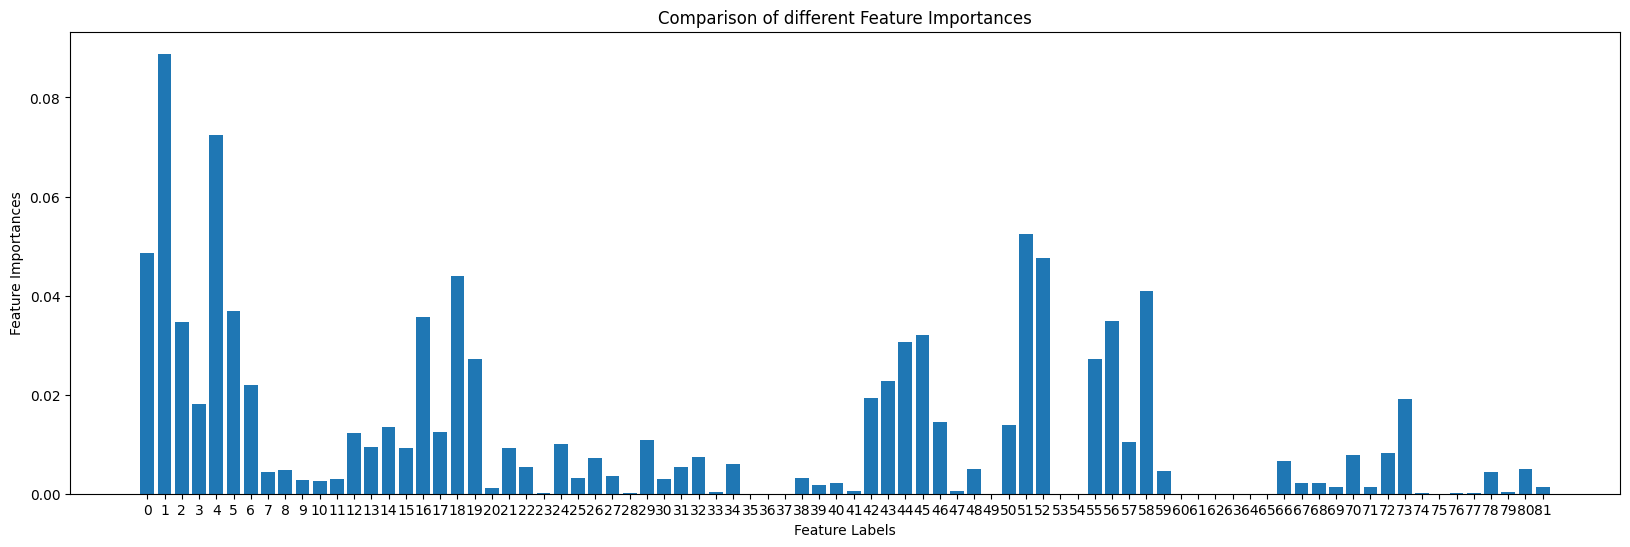

In [ ]:
# Plotting a Bar Graph to compare the models
plt.figure(figsize=(20, 6))
plt.bar(col_index_map.values(), feature_importance)
plt.xticks(np.arange(0, 82, step=1))
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()



---



In [ ]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(extra_tree_forest, prefit=True)
X_new = model.transform(X)
print(X_new.shape)
selected_features = X.columns[model.get_support()]

(225745, 25)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
selected_features

Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp',
       ' Fwd Packet Length Max', ' Fwd Packet Length Mean',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', ' PSH Flag Count',
       ' ACK Flag Count', ' URG Flag Count', ' Down/Up Ratio',
       ' Average Packet Size', ' Avg Bwd Segment Size',
       ' min_seg_size_forward'],
      dtype='object')

In [ ]:
X_new1 = dataframe[selected_features]

In [ ]:
X_new1

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Fwd Packet Length Max,Fwd Packet Length Mean,Bwd Packet Length Max,...,Packet Length Mean,Packet Length Std,Packet Length Variance,PSH Flag Count,ACK Flag Count,URG Flag Count,Down/Up Ratio,Average Packet Size,Avg Bwd Segment Size,min_seg_size_forward
0,82985,22,443,866,54865,6,0,6,6.0,0,...,6.0,0.0,0.0,0,1,0,0,9.0,0.0,20
1,83017,37,80,866,55054,6,0,6,6.0,6,...,6.0,0.0,0.0,0,1,1,1,9.0,6.0,20
2,83018,37,80,866,55055,6,0,6,6.0,6,...,6.0,0.0,0.0,0,1,1,1,9.0,6.0,20
3,57106,45,443,860,46236,6,0,6,6.0,6,...,6.0,0.0,0.0,0,1,1,1,9.0,6.0,20
4,83023,49,443,866,54863,6,0,6,6.0,0,...,6.0,0.0,0.0,0,1,0,0,9.0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,56764,1925,80,859,61374,6,92,6,6.0,6,...,6.0,0.0,0.0,0,1,1,1,9.0,6.0,20
225741,56768,1925,80,859,61378,6,92,6,6.0,6,...,6.0,0.0,0.0,0,1,1,1,9.0,6.0,20
225742,56765,1925,80,859,61375,6,92,6,6.0,6,...,6.0,0.0,0.0,0,1,1,1,9.0,6.0,20
225743,56856,1983,80,859,61323,6,92,6,6.0,0,...,6.0,0.0,0.0,0,1,0,0,9.0,0.0,20


In [ ]:
X_new1.to_csv('X.csv')
y.to_csv('y.csv')